In [1]:
import numpy as np
import skimage as ski

from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt

In [2]:
# Load the sample image

I = ski.io.imread("track.jpg")

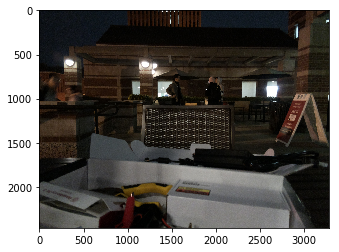

In [3]:
plt.imshow(I)

In [4]:
# Print the image dimensions in pixels

I.shape

(2464, 3280, 3)

In [5]:
# Conversion to gray
Ibw = ski.color.rgb2gray(I)

In [6]:
# Since the image has a black line on a white background 
# we invert the image by substracting it from its maximum value.
# We also select a smaller region of interest

ROI = Ibw.max() - Ibw[1350:1400, 1000:3000]

In [7]:
# Print the minimum and the maximum values

ROI.min(), ROI.max()

(0.20534235294117642, 1.0)

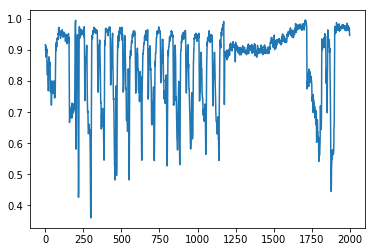

In [8]:
# Select the 25th row in the image for line detection
L = ROI[25]

# Plot the intensities across this row
plt.plot(L)

In [9]:
# Due to the noise in the image the algorithm finds many peaks heigher than 0.5
find_peaks(L, height=0.5)

(array([   4,    8,   10,   16,   24,   30,   36,   44,   46,   56,   64,
          69,   73,   77,   81,   85,   88,   90,   97,   99,  102,  108,
         111,  120,  123,  127,  137,  141,  148,  150,  152,  155,  164,
         166,  172,  176,  180,  182,  184,  187,  190,  199,  209,  212,
         224,  229,  232,  238,  243,  246,  250,  252,  256,  264,  267,
         272,  279,  286,  291,  306,  309,  312,  315,  318,  320,  323,
         326,  332,  335,  338,  341,  352,  355,  357,  365,  370,  376,
         380,  392,  396,  400,  406,  408,  414,  417,  420,  425,  442,
         449,  465,  475,  478,  484,  489,  492,  494,  498,  504,  507,
         522,  530,  536,  538,  545,  556,  559,  567,  572,  579,  583,
         586,  589,  595,  601,  605,  610,  616,  623,  626,  641,  647,
         652,  654,  657,  660,  664,  666,  669,  672,  683,  688,  693,
         711,  721,  734,  737,  739,  745,  747,  751,  754,  761,  764,
         769,  772,  778,  783,  786, 

In [10]:
# To filter the noise in the image we use a 3rd order Butterworth filter

# Wn = 0.02, the cut-off frequency, acceptable values are from 0 to 1
b, a = butter(3, 0.02)

In [11]:
# Filter the selected row in the image using the above filter coefficients a, b
Lf = filtfilt(b, a, L)

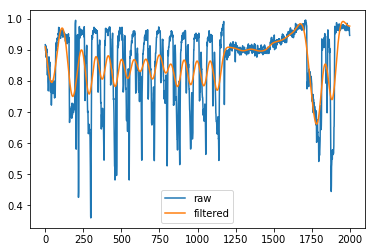

In [12]:
# Plot the pixel intensities along the selected row
plt.plot(L, label="raw")
plt.plot(Lf, label="filtered")

plt.legend()

In [13]:
# Find the two peaks in the filtered data
find_peaks(Lf, height=0.5)

(array([ 111,  238,  334,  414,  501,  584,  660,  749,  824,  912,  997,
        1083, 1204, 1351, 1676, 1839, 1956], dtype=int32),
 {'peak_heights': array([0.97083364, 0.90064222, 0.87884636, 0.88175569, 0.86997416,
         0.86942543, 0.8707533 , 0.88413459, 0.85499108, 0.86793307,
         0.86475288, 0.86481753, 0.9093664 , 0.90302439, 0.98459633,
         0.85515233, 0.9922581 ])})

In [14]:
%%timeit

## Estimate the run time of the line detection algorithm

# Select the 25th row in the image for line detection
L = ROI[25]

# To filter the noise in the image we use a 3rd order Butterworth filter
b, a = butter(3, 0.02)

# Smooth the transitions so we can detect the peaks 
Lf = filtfilt(b, a, L)

# Find peaks which are higher than 0.5
p = find_peaks(Lf, height=0.5)

6.08 ms ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
